# BMEG 424/524 Tutorial 5: Clustering + K-Means

This tutorial three main goals: (1) get you comfortable with running Python on Google Colab, (2) explain clustering, and (3) mathematically present the k-means algorithm. There is no required biological background for this tutorial - you will use the concepts here for Assignment 5 and future tutorials.


## Google Colab
This cloud-based computing platform is effectively an "online jupyter notebook" that has tons of pre-installed data science and ML libraries that make it easy to prototype models / code in Python. In practice, if you intend to regularly use Python, you would work on a server or locally if your PC is sufficient.

## Clustering

Previously we've explored the idea of sets, intersects, and unions using the example of genomic regions. The Jaccard Index was used to measure the similarity between the two sets (of genomics regions).

Now, looking at a single set, what if ask the question: how can we group our regions such that similar regions form their own clusters (aka new subsets)?

> Given regions $G = \{g_1, g_2, ..., g_n\}$ how can we organize two new sets/groups/clusters of regions $C_1$ and $C_2$ such that $C_1 \cup C_2=G$ and $C_1 \cap C_2=\emptyset$.

Recognize the above definition is pretty general, and "regions" can be replaced with any other object (genes, cells, cars, animals, people, etc.). Instead of two clusters we could arbitrarily ask for $N$ clusters (or later you will see $k$ clusters).

![Example with three clusters](https://developers.google.com/static/machine-learning/clustering/images/clustering_example.png)

A natural question now that we know WHAT we want to do: HOW? Informally, to meaningfully cluster a set (of elements), we need to be able to compare between elements numerically. If we are clustering a 1000 cells, we may want to cluster them based on their gene expression - which ones have similar expression patters, chromatin accessibility - which cells have a similar epigenomic profile, or spatial location - which cells are found in physical space together. You could be ambitious and even attempt to cluster cells based on all three peices of information at the same time and ask how you can group cells that have similar gene expression signatures, epigenetic profiles, and are found physically close together in space.

But again, how do we measure/compare these cells? Mathematically, metrics like Jacard Index, or even simpler ones like Eucludian distance (i.e. how far apart are the gene expression signatures of each cells from one another), are used as a basis for creating a computer-interpretable dataset for clustering. An algorithm, or human, can easily found cells that are "close" to each other based on some metric.  

![Metrics](https://miro.medium.com/v2/resize:fit:1400/1*BKcnB65yMzjbRAy7FQwn3w.png)

### K-Means Algorithm

This is one such algo that relies typically on Eucldian distances. The objective of K-Means is to find a position for $k$ centroids that minimizes intra-group variance. Essentially we would like to find $k$ different positions such that all the points nicely go to the closest one, with said closest centroid being optimally positioned. This is actually an NP-hard (very tricky to find the best position for $k$ centroids as the number of items $n$ in your dataset increases).

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/500px-K-means_convergence.gif)

The wikipedia does a decent job at outlining key math: https://en.wikipedia.org/wiki/K-means_clustering

Given centroids $\mu_k$ and data points $x_i$, organize the data into $k$ clusters $C_k$ (where each clusters is assigned zero or more of the points) such that:

$$\text{arg min}_{\textbf{C}} \text{arg min}_{\mu} \sum^N_i \sum^K_k || x_i - \mu_k ||$$

An approach to solving this requires iteration: (1) assignment, and (2) update.

0. Randomly initialize $k$ centroids.
1. Based on Eucludian distance, assign each point to the closest centroid $mu_k$. Here you are creating $k$ clusters $C_k$, but they are very sub-optimal.
2. Compute the new centroid (mean) of each cluster and "relocate" the cluster's centroid to that position. You get a slightly more optimal positioning.

-- Repeat 1 and 2 until convergance (or iteration limit).

![](https://stanford.edu/~cpiech/cs221/img/kmeans3d.png)


# DATA FOR TUTORIAL

Driver Data: https://github.com/JangirSumit/kmeans-clustering/blob/master/driver-data.csv

# Can we group drivers based on distance travelled & average amount of "speeding"?

> Simple two variable problem. In reality many factors impact how much someone drives or how fast they may go on a given day.


Lets start by loading in the data.

In [3]:
# connect google colab to your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
data_path = "/content/drive/MyDrive/driver-data.csv"

df = pd.read_csv(data_path)
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


Lets visualize these points - currently we have zero labels for these IDs other than the two features.

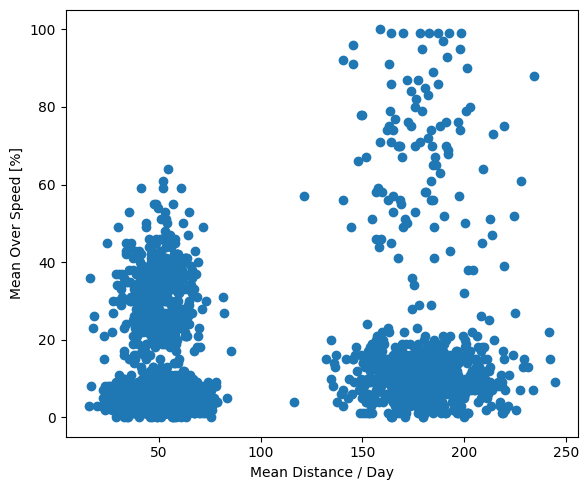

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(df["mean_dist_day"], df["mean_over_speed_perc"])
ax.set_xlabel("Mean Distance Travelled / Day")
ax.set_ylabel("Mean Over Speed [%]")
fig.tight_layout()

**How many clusters do you see? 2, 3, 4, 5?**



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# features (last two columns)
X = df[["mean_dist_day", "mean_over_speed_perc"]].to_numpy()

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Play around with the code below: how does change k and random state impact the results?

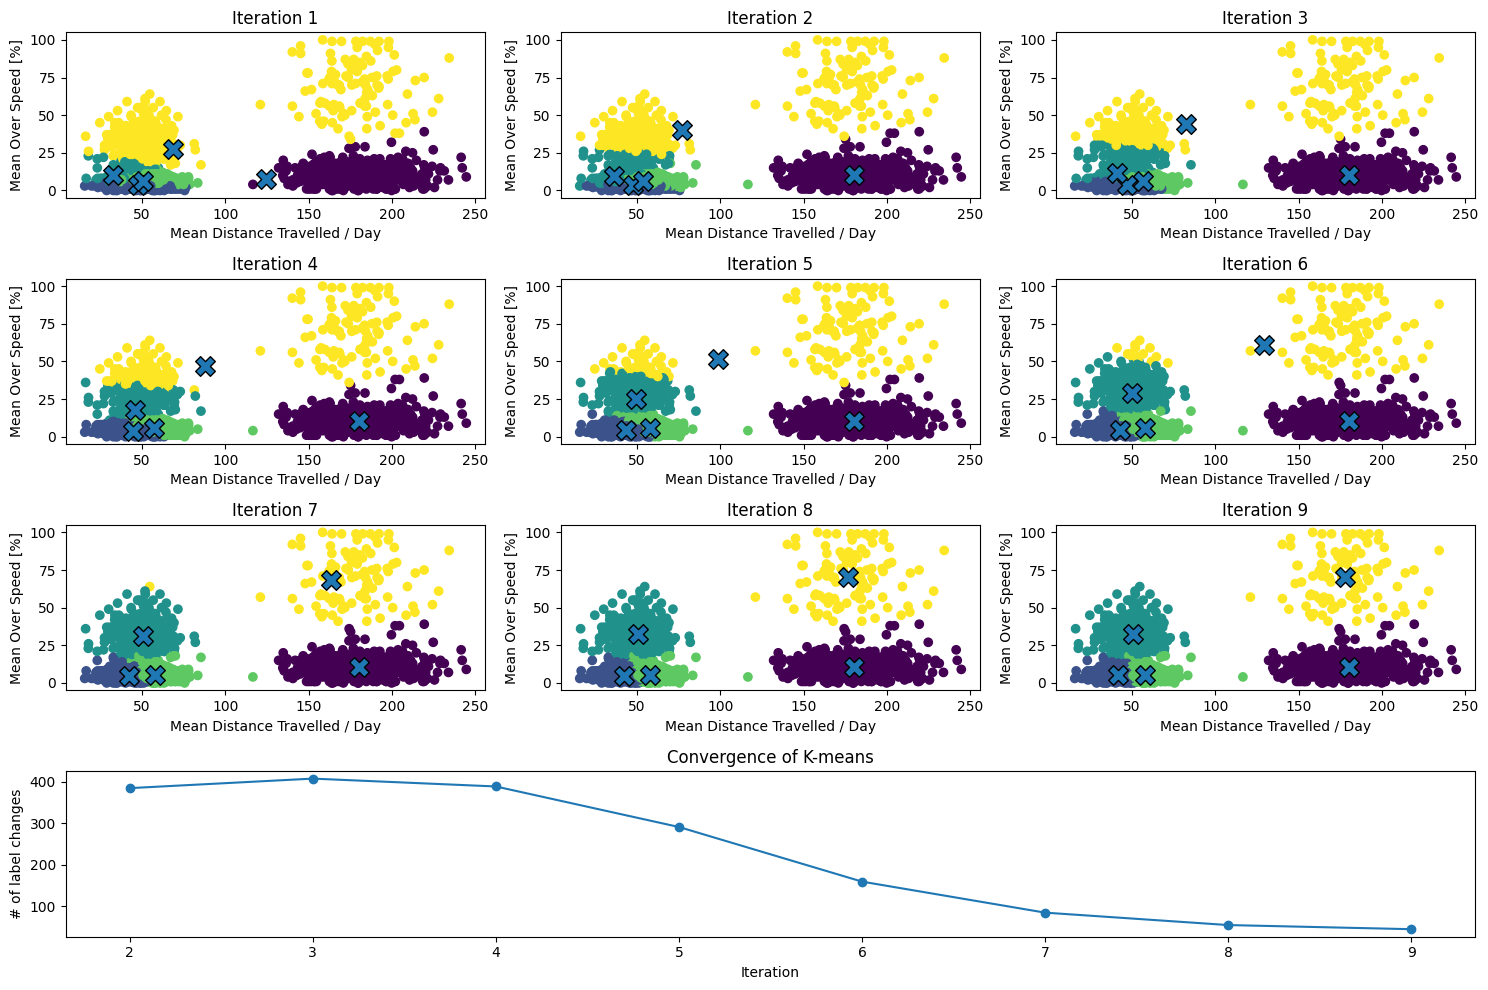

In [37]:
## CODE FROM CHATGPT
k = 5
n_iters = 9

# initialize once
kmeans = KMeans(
    n_clusters=k,
    init="random",
    n_init=1,
    max_iter=1,
    random_state=0,
    algorithm="lloyd"
)

centroids = None
prev_labels = None
changes = []

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(4, 3)

axes_scatter = [
    fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2]),
    fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]), fig.add_subplot(gs[1, 2]),
    fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1]), fig.add_subplot(gs[2, 2])
]
ax_curve = fig.add_subplot(gs[3, :])

for i in range(n_iters):
    if centroids is not None:
        kmeans.init = centroids   # UPDATE CENTROID FOR THIS ITERATION

    labels = kmeans.fit_predict(X_scaled)  # UPDATE ASSIGNMENTS
    centroids = kmeans.cluster_centers_

    if prev_labels is None:
        changes.append(0)
    else:
        changes.append(np.sum(labels != prev_labels))

    prev_labels = labels.copy()

    centers_orig = scaler.inverse_transform(centroids)

    ax = axes_scatter[i]
    ax.scatter(df["mean_dist_day"], df["mean_over_speed_perc"], c=labels)
    ax.scatter(
        centers_orig[:, 0],
        centers_orig[:, 1],
        marker="X",
        s=200,
        edgecolors="k"
    )
    ax.set_title(f"Iteration {i+1}")
    ax.set_xlabel("Mean Distance Travelled / Day")
    ax.set_ylabel("Mean Over Speed [%]")

# curve of assignment changes

# SKIP ITERATION 1 AS WE DONT KNOW INITIAL STARTS FROM KMEANS
ax_curve.plot(range(2, n_iters + 1), changes[1:], marker="o")
ax_curve.set_xlabel("Iteration")
ax_curve.set_ylabel("# of label changes")
ax_curve.set_title("Convergence of K-means")

fig.tight_layout()
plt.show()

Is there any robust-ish way of picking a good K-value? What if we simply keep picking larger Ks? That would surely minimize our error.

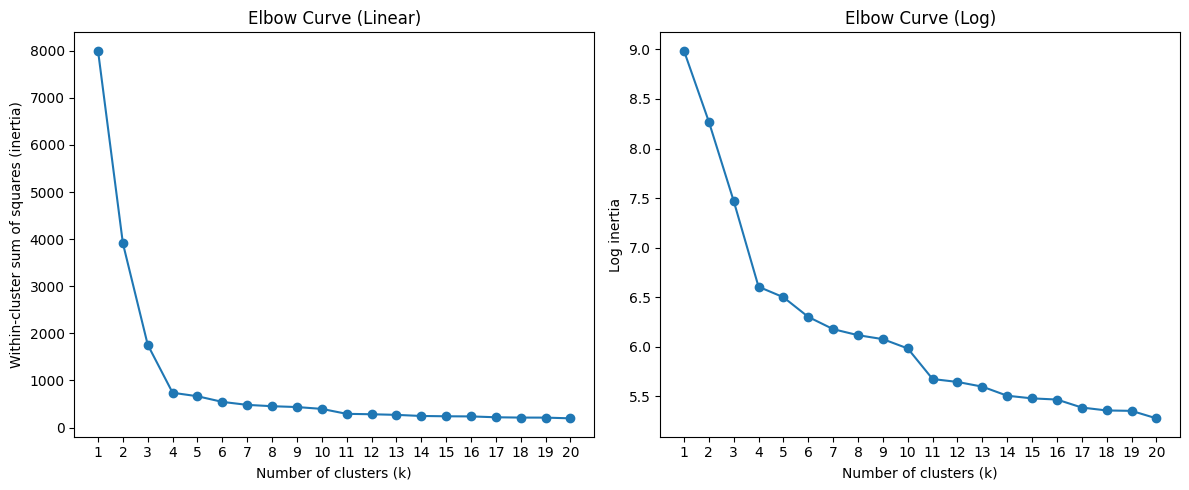

In [43]:
# range of k
k_values = range(1, 21)
inertias = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        init="random",
        n_init=10,
        random_state=0,
        algorithm="lloyd"
    )
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# elbow plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# linear scale
axes[0].plot(k_values, inertias, marker="o")
axes[0].set_xlabel("Number of clusters (k)")
axes[0].set_ylabel("Within-cluster sum of squares (inertia)")
axes[0].set_title("Elbow Curve (Linear)")
axes[0].set_xticks(list(k_values))

# log scale
axes[1].plot(k_values, np.log(inertias), marker="o")
axes[1].set_xlabel("Number of clusters (k)")
axes[1].set_ylabel("Log inertia")
axes[1].set_title("Elbow Curve (Log)")
axes[1].set_xticks(list(k_values))

fig.tight_layout()